# Cluster Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\ML_WORK\Kaggle\Titanic\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## features

In [4]:
X = df.loc[:,['Pclass','Sex','SibSp','Parch','Embarked','Fare']]

X.Embarked.fillna('S',axis=0, inplace=True)


## onehotencoding

In [5]:
X = pd.get_dummies(data=X, columns=['Sex', 'Embarked'])

## kmeans for cluster analysis

In [6]:
from sklearn.cluster import KMeans

In [7]:
variance = []
for i in range(1,10):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    variance.append(km.inertia_)

## reducing_variance

In [8]:
reducing_variance = pd.DataFrame(variance, columns=['variance'])
reducing_variance

,variance
0,2.200872e+06
1,8.498734e+05
2,4.026625e+05
3,1.983476e+05
4,1.072703e+05
5,5.519311e+04
6,3.755812e+04
7,2.847008e+04
8,2.191910e+04


## elbow meathod to select clusters

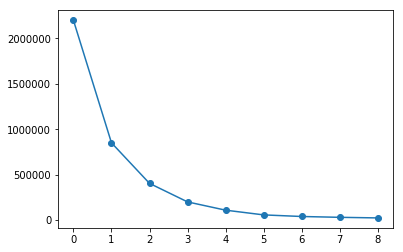

In [9]:
plt.plot(variance,'o-')
plt.show()

## model

In [10]:
km1 = KMeans(n_clusters=5,random_state=0)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
df['Psegment'] = km1.labels_

In [12]:
df.loc[(df['Psegment'] == 0),'Psegment'] = 'Lower_mid'

df.loc[(df['Psegment'] == 1),'Psegment'] = 'Mid'

df.loc[(df['Psegment'] == 2),'Psegment'] = 'Low'

df.loc[(df['Psegment'] == 3),'Psegment'] = 'High'

df.loc[(df['Psegment'] == 4),'Psegment'] = 'upper_mid'


## Count as per gender

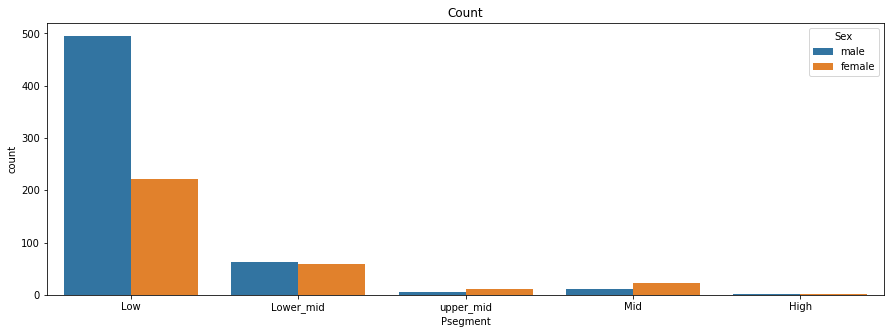

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Psegment',hue='Sex')
plt.title('Count')
plt.show()

## count in passenger class

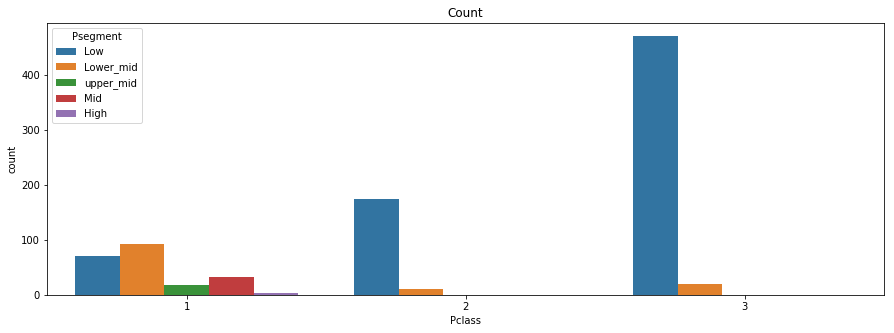

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Pclass',hue='Psegment')
plt.title('Count')
plt.show()

## Average fare

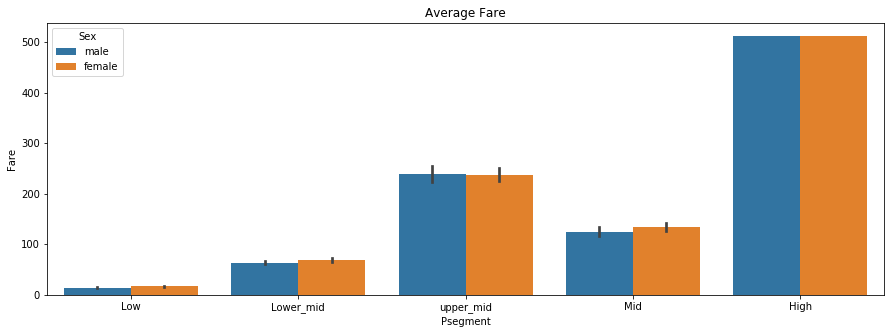

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Psegment', y='Fare',hue='Sex')
plt.title('Average Fare')
plt.show()

## Average Age

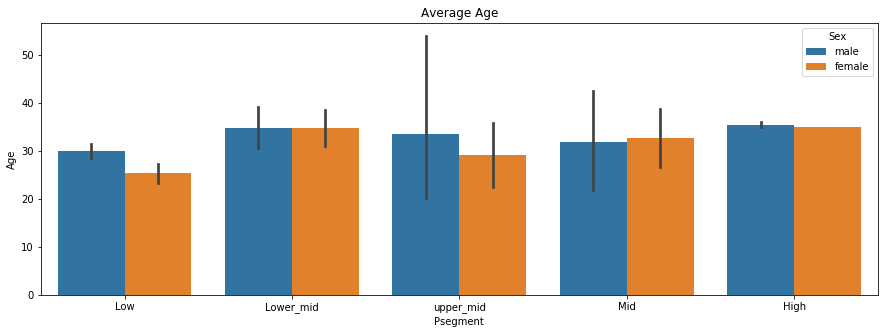

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Psegment', y='Age',hue='Sex')
plt.title('Average Age')
plt.show()